### Code: Lima metropolitana Map according poverty, education level and income

### Author: Roberto Mendoza

### Date: 09/09/2022

### updated date: 


In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [2]:
# import package pandas, geopandas, plots

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon

import dask.dataframe as dd

In [3]:
#maps = gpd.read_file('..\Transporte\Transporte\shapefile\DISTRITOS.shp')
#maps = gpd.read_file(r'..\Transporte\Transporte\shapefile\DISTRITOS.shp')

In [4]:
#maps1  = gpd.read_file(r"..\Poverty_map\5_Informacion_Cartografica-Shape\ATE\ATE.shp")

In [5]:
#maps1[maps1.UBIGEO == '150103']
#maps1

In [6]:
#maps1.dtypes

In [7]:
#maps1['MANZANA_A'].replace([None],"0", inplace =True)

In [8]:
#maps1['manzana_id'] = maps1['UBIGEO']+ maps1['ZONA'] + maps1['MANZANA_ID'] + maps1['MANZANA_A']
#maps1

In [9]:
#maps1.to_csv('manzana.csv')

In [10]:
manzana0 = pd.DataFrame()
manzana0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [113]:
# selecting distric

district = ['ATE', 'BARRANCO','BREÑA', 'CALLAO', 'CARABAYLLO','CHACLACAYO','CHORRILLOS','CIENEGUILLA','COMAS','EL_AGUSTINO','INDEPENDENCIA',
           'JESUS_MARIA','LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','LURIGANCHO_LIMA','LURIN','MAGDALENA_DEL_MAR',
           'MIRAFLORES','PACHACAMAC','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_ISIDRO','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES','SAN_LUIS',
            'SAN_MARTIN_DE_PORRES','SAN_MIGUEL','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']



In [114]:
#district = ['ATE', 'BARRANCO','BREÑA', 'CARABAYLLO','CHACLACAYO','CHORRILLOS']

In [115]:
#maps  = gpd.read_file(r"..\Poverty_map\5_Informacion_Cartografica-Shape\Lima\LIMA.shp")
data_files = "../Poverty_map/5_Informacion_Cartografica-Shape/"
 

i = 0

for j in district:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{data_files}{j}/{j}.shp')
        globals()[f'manzana{i}'] = globals()[f'manzana{i}'][['Mz','geometry']]
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})

      
     

        
        
Fmapa = manzana1.copy()

for k in range(2,i+1):
    Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)

    

#maps1  = gpd.read_file(r"..\Poverty_map\5_Informacion_Cartografica-Shape\NUEVO\RIMAC_LIMA.shp")
#maps1.info()

In [116]:
Fmapa.shape

(98240, 2)

In [117]:
#Fmapa
Fmapa['bool_series'] = Fmapa.duplicated(["id_manzana"])

In [118]:
# 670 duplicates id_manzana that share same coordinates, hence I dropped repeated 
Fmapa[Fmapa['bool_series'] == 1]
Fmapa = Fmapa[Fmapa['bool_series'] == 0]
Fmapa

,id_manzana,geometry,bool_series
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",False
1,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",False
2,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",False
3,150103000102900018,"POLYGON ((-76.92292 -12.02466, -76.92240 -12.0...",False
4,150103000103800056,"POLYGON ((-76.89258 -12.03403, -76.89291 -12.0...",False
...,...,...,...
98235,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",False
98236,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",False
98237,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",False
98238,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",False


In [119]:
#import pyreadr

manzana_data = pd.read_stata(r'../Censo/data_manzana.dta')

In [120]:
manzana_data

,id_manzana,UBIGEO,CODCCPP,ZONA_ID,ZONA_A,MANZANA_ID,MANZANA_A,GRUPO1,GRUPO2,GRUPO3,...,var10,var11,var12,var13,var14,var15,var16,var17,var18,duplicates
0,150101000100100001,150101,0001,001,NaN,001,,33.0,19.0,19.0,...,0.078788,0.103030,0.363636,0.133333,0.159420,0.042424,0.050725,0.175758,0.210145,0
1,150101000100100003,150101,0001,001,NaN,003,,5.0,1.0,2.0,...,0.000000,0.142857,0.339286,0.089286,0.125000,0.071429,0.100000,0.160714,0.225000,0
2,150101000100100004,150101,0001,001,NaN,004,,18.0,30.0,30.0,...,0.059574,0.114894,0.280851,0.085106,0.101523,0.174468,0.208122,0.259574,0.309645,0
3,150101000100100005,150101,0001,001,NaN,005,,21.0,18.0,34.0,...,0.060942,0.124654,0.310249,0.063712,0.076667,0.116343,0.140000,0.180055,0.216667,0
4,150101000100100007,150101,0001,001,NaN,007,,25.0,22.0,16.0,...,0.051095,0.138686,0.350365,0.094891,0.118182,0.083942,0.104545,0.178832,0.222727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,150143000108700033C,150143,0001,087,NaN,033,C,4.0,2.0,0.0,...,0.000000,0.317073,0.390244,0.048780,0.071429,0.000000,0.000000,0.048780,0.071429,0
61625,150143000108700033F,150143,0001,087,NaN,033,F,5.0,7.0,5.0,...,0.000000,0.133333,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
61626,150143000108700034L,150143,0001,087,NaN,034,L,1.0,7.0,2.0,...,0.000000,0.093750,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
61627,150143000108800022A,150143,0001,088,NaN,022,A,3.0,3.0,2.0,...,0.000000,0.242424,0.484848,0.000000,0.000000,0.060606,0.076923,0.060606,0.076923,0


In [121]:
base_map_manzana = pd.merge(manzana_data, Fmapa , how = "inner" , on =["id_manzana"])

In [122]:
# 96% from Censo's observation is matched to cartography data
# in abolsute terms, 2 000 manzanas from Censo were not matched

base_map_manzana 

,id_manzana,UBIGEO,CODCCPP,ZONA_ID,ZONA_A,MANZANA_ID,MANZANA_A,GRUPO1,GRUPO2,GRUPO3,...,var12,var13,var14,var15,var16,var17,var18,duplicates,geometry,bool_series
0,150101000100100001,150101,0001,001,NaN,001,,33.0,19.0,19.0,...,0.363636,0.133333,0.159420,0.042424,0.050725,0.175758,0.210145,0,"POLYGON ((-77.08219 -12.03661, -77.08295 -12.0...",False
1,150101000100100003,150101,0001,001,NaN,003,,5.0,1.0,2.0,...,0.339286,0.089286,0.125000,0.071429,0.100000,0.160714,0.225000,0,"POLYGON ((-77.08014 -12.03582, -77.07995 -12.0...",False
2,150101000100100004,150101,0001,001,NaN,004,,18.0,30.0,30.0,...,0.280851,0.085106,0.101523,0.174468,0.208122,0.259574,0.309645,0,"POLYGON ((-77.07790 -12.03652, -77.07863 -12.0...",False
3,150101000100100005,150101,0001,001,NaN,005,,21.0,18.0,34.0,...,0.310249,0.063712,0.076667,0.116343,0.140000,0.180055,0.216667,0,"POLYGON ((-77.07976 -12.03641, -77.07886 -12.0...",False
4,150101000100100007,150101,0001,001,NaN,007,,25.0,22.0,16.0,...,0.350365,0.094891,0.118182,0.083942,0.104545,0.178832,0.222727,0,"POLYGON ((-77.08185 -12.03681, -77.08094 -12.0...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59402,150143000108700033C,150143,0001,087,NaN,033,C,4.0,2.0,0.0,...,0.390244,0.048780,0.071429,0.000000,0.000000,0.048780,0.071429,0,"POLYGON ((-76.93375 -12.13256, -76.93384 -12.1...",False
59403,150143000108700033F,150143,0001,087,NaN,033,F,5.0,7.0,5.0,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,"POLYGON ((-76.93574 -12.13501, -76.93570 -12.1...",False
59404,150143000108700034L,150143,0001,087,NaN,034,L,1.0,7.0,2.0,...,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,"POLYGON ((-76.93637 -12.13424, -76.93634 -12.1...",False
59405,150143000108800022A,150143,0001,088,NaN,022,A,3.0,3.0,2.0,...,0.484848,0.000000,0.000000,0.060606,0.076923,0.060606,0.076923,0,"POLYGON ((-76.94532 -12.12812, -76.94543 -12.1...",False


In [123]:
# from Data.Frame to Geo.DataFrame 

MAP = gpd.GeoDataFrame(base_map_manzana, geometry='geometry')

In [124]:
MAP.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 59407 entries, 0 to 59406
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id_manzana     59407 non-null  object  
 1   UBIGEO         59407 non-null  object  
 2   CODCCPP        59407 non-null  object  
 3   ZONA_ID        59407 non-null  object  
 4   ZONA_A         38 non-null     float64 
 5   MANZANA_ID     59407 non-null  object  
 6   MANZANA_A      59407 non-null  object  
 7   GRUPO1         59407 non-null  float64 
 8   GRUPO2         59407 non-null  float64 
 9   GRUPO3         59407 non-null  float64 
 10  C5_P13_3       59407 non-null  float64 
 11  C5_P13_4       59407 non-null  float64 
 12  POB_TOTAL      59407 non-null  float64 
 13  C5_P8_1        59407 non-null  float64 
 14  C5_P8_2        59407 non-null  float64 
 15  C5_P8_4        59407 non-null  float64 
 16  C5_P13_6       59407 non-null  float64 
 17  C5_P13_7       59407 no

In [125]:
#fig, ax = plt.subplots(figsize=(10, 15))

#MAP.plot( color='none', edgecolor='black', zorder=0.0001, ax= ax)
#   1.plot( color='none', edgecolor='black', zorder=0.5, ax= ax)

In [126]:

#MAP.to_csv('manzana.csv')

In [127]:
# var 1: age 15-25 / total population per each manzana
# var 2: age 15-25 / PET
# var 3: age 15-29 / total population per each manzana
# var 4: age 15-29 / PET
# var 5: PEAO / PET
# var 6 : (PEA - PEAO) / PEA
# var 7: PEAO/PEA
# var 8: SIS/POB_TOTAL
# var 9: ESSALUD/POB_TOTAL
# var 10: Seguro privado /POB_TOTAL
# var11: n° educación primaria/ POB_TOTAL
# var12: n° educación secundaria/ POB_TOTAL
# var13: n° educación superior universitaria incompleta / POB_TOTAL
# var14: n° educación superior universitaria incompleta / PET
# var15: n° educación superior universitaria completa / POB_TOTAL
# var16: n° educación superior universitaria completa / PET
# var17: n° educación superior universitaria incompleta + completa /POB_TOTAL
# var18: n° educación superior universitaria incompleta + completa / PET

In [128]:

cols = ['var'+str(i) for i in range(1, 19)] #  loop
MAP[cols] = (MAP[cols]*100).round(0) # vars in percentage and round 2 decimals
MAP

,id_manzana,UBIGEO,CODCCPP,ZONA_ID,ZONA_A,MANZANA_ID,MANZANA_A,GRUPO1,GRUPO2,GRUPO3,...,var12,var13,var14,var15,var16,var17,var18,duplicates,geometry,bool_series
0,150101000100100001,150101,0001,001,NaN,001,,33.0,19.0,19.0,...,36.0,13.0,16.0,4.0,5.0,18.0,21.0,0,"POLYGON ((-77.08219 -12.03661, -77.08295 -12.0...",False
1,150101000100100003,150101,0001,001,NaN,003,,5.0,1.0,2.0,...,34.0,9.0,12.0,7.0,10.0,16.0,22.0,0,"POLYGON ((-77.08014 -12.03582, -77.07995 -12.0...",False
2,150101000100100004,150101,0001,001,NaN,004,,18.0,30.0,30.0,...,28.0,9.0,10.0,17.0,21.0,26.0,31.0,0,"POLYGON ((-77.07790 -12.03652, -77.07863 -12.0...",False
3,150101000100100005,150101,0001,001,NaN,005,,21.0,18.0,34.0,...,31.0,6.0,8.0,12.0,14.0,18.0,22.0,0,"POLYGON ((-77.07976 -12.03641, -77.07886 -12.0...",False
4,150101000100100007,150101,0001,001,NaN,007,,25.0,22.0,16.0,...,35.0,9.0,12.0,8.0,10.0,18.0,22.0,0,"POLYGON ((-77.08185 -12.03681, -77.08094 -12.0...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59402,150143000108700033C,150143,0001,087,NaN,033,C,4.0,2.0,0.0,...,39.0,5.0,7.0,0.0,0.0,5.0,7.0,0,"POLYGON ((-76.93375 -12.13256, -76.93384 -12.1...",False
59403,150143000108700033F,150143,0001,087,NaN,033,F,5.0,7.0,5.0,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"POLYGON ((-76.93574 -12.13501, -76.93570 -12.1...",False
59404,150143000108700034L,150143,0001,087,NaN,034,L,1.0,7.0,2.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"POLYGON ((-76.93637 -12.13424, -76.93634 -12.1...",False
59405,150143000108800022A,150143,0001,088,NaN,022,A,3.0,3.0,2.0,...,48.0,0.0,0.0,6.0,8.0,6.0,8.0,0,"POLYGON ((-76.94532 -12.12812, -76.94543 -12.1...",False


In [129]:
MAP[cols].describe() 
MAP[cols].quantile([.1, .25, .5, .75, 0.9,1], axis = 0)

# 10% upper range increase abruptly in amost all variables 

# var 1: age 15-25 / total population per each manzana
# var 2: age 15-25 / PET
# var 3: age 15-29 / total population per each manzana
# var 4: age 15-29 / PET
# var 5: PEA / PET
# var 6 : (PEA - PEAO) / PEA
# var 7: PEAO/PEA
# var 8: SIS/POB_TOTAL
# var 9: ESSALUD/POB_TOTAL
# var 10: Seguro privado /POB_TOTAL
# var11: n° educación primaria/ POB_TOTAL
# var12: n° educación secundaria/ POB_TOTAL
# var13: n° educación superior universitaria incompleta / POB_TOTAL
# var14: n° educación superior universitaria incompleta / PET
# var15: n° educación superior universitaria completa / POB_TOTAL
# var16: n° educación superior universitaria completa / PET
# var17: n° educación superior universitaria incompleta + completa /POB_TOTAL
# var18: n° educación superior universitaria incompleta + completa / PET

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18
0.10,11.0,14.0,18.0,22.0,51.0,0.0,90.0,7.0,14.0,0.0,9.0,22.0,0.0,0.0,0.0,0.0,2.0,3.0
0.25,14.0,17.0,22.0,27.0,56.0,2.0,93.0,18.0,23.0,0.0,13.0,33.0,3.0,4.0,2.0,3.0,6.0,8.0
0.50,17.0,21.0,26.0,33.0,61.0,4.0,96.0,30.0,32.0,2.0,18.0,40.0,6.0,7.0,6.0,8.0,12.0,15.0
0.75,20.0,26.0,30.0,39.0,66.0,7.0,98.0,42.0,42.0,6.0,22.0,46.0,9.0,11.0,13.0,16.0,22.0,27.0
0.90,24.0,32.0,35.0,46.0,70.0,10.0,100.0,54.0,50.0,19.0,27.0,52.0,13.0,15.0,25.0,30.0,37.0,44.0
1.00,91.0,91.0,96.0,96.0,100.0,100.0,100.0,100.0,88.0,95.0,78.0,86.0,49.0,53.0,65.0,68.0,81.0,83.0


In [130]:
import plotly.figure_factory as ff
#import geoplot as gplt
#conda install -c plotly plotly-geo

# Map 1: age 15-25 / total population per manzana

C:\Users\Roberto Carlos\anaconda3\envs\geopandas_env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


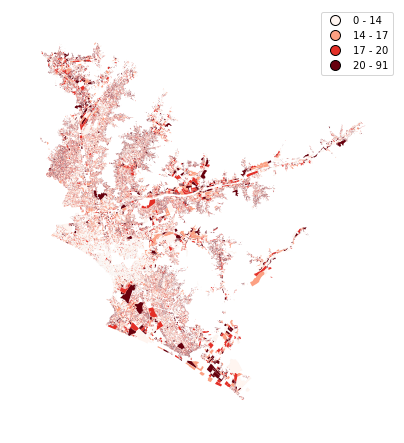

In [131]:
# Set up the color sheme:
import mapclassify as mc
import geoplot as gplt



fig, ax = plt.subplots(figsize=(7, 9))
scheme = mc.Quantiles(MAP['var1'], k=4)

# Map
hb = gplt.choropleth(MAP, 
    hue="var1", 
    linewidth=.001,
    scheme=scheme, cmap='Reds',
    legend=True,
    edgecolor='black',
    ax=ax
);

#ax.set_title(' ', fontsize=13);

In [132]:
#fig, ax = plt.subplots(figsize=(9, 7))

#hb = MAP.plot( column='var1', 
               #cmap='Reds', 
               #legend = True, 
               #ax=ax )

#plt.legend('')

#plt.colorbar(hb, shrink=0.5,anchor=(0.5, 0.5),label='(%)',ticks=np.linspace(0, 18, 4))

In [133]:
MAP['centroid'] = MAP['geometry'].centroid
#Extract lat and lon from the centerpoint
MAP["lat"] = MAP.centroid.map(lambda p: p.x)
MAP["long"] = MAP.centroid.map(lambda p: p.y)

C:\Users\Roberto Carlos\anaconda3\envs\geopandas_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\Roberto Carlos\anaconda3\envs\geopandas_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Roberto Carlos\anaconda3\envs\geopandas_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd 

In [134]:
MAP.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 59407 entries, 0 to 59406
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id_manzana     59407 non-null  object  
 1   UBIGEO         59407 non-null  object  
 2   CODCCPP        59407 non-null  object  
 3   ZONA_ID        59407 non-null  object  
 4   ZONA_A         38 non-null     float64 
 5   MANZANA_ID     59407 non-null  object  
 6   MANZANA_A      59407 non-null  object  
 7   GRUPO1         59407 non-null  float64 
 8   GRUPO2         59407 non-null  float64 
 9   GRUPO3         59407 non-null  float64 
 10  C5_P13_3       59407 non-null  float64 
 11  C5_P13_4       59407 non-null  float64 
 12  POB_TOTAL      59407 non-null  float64 
 13  C5_P8_1        59407 non-null  float64 
 14  C5_P8_2        59407 non-null  float64 
 15  C5_P8_4        59407 non-null  float64 
 16  C5_P13_6       59407 non-null  float64 
 17  C5_P13_7       59407 no

# Map 1: age 15-25 / total population per manzana

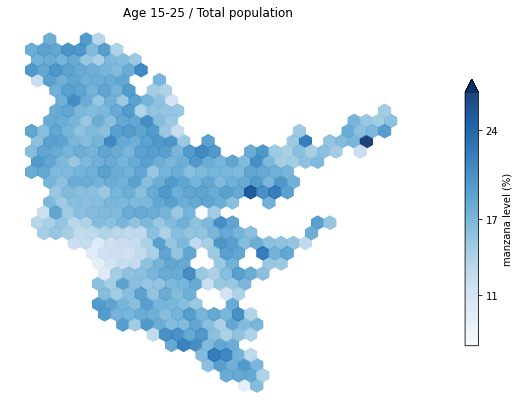

In [216]:

figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var1 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
#plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)',ticks=np.linspace(10, 30,5))
bar = plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)', extend = "max")
bar.set_ticks(MAP["var1"].quantile([.1, .5, 0.9]))

ax.set_title('Age 15-25 / Total population', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map11.png', dpi=800)


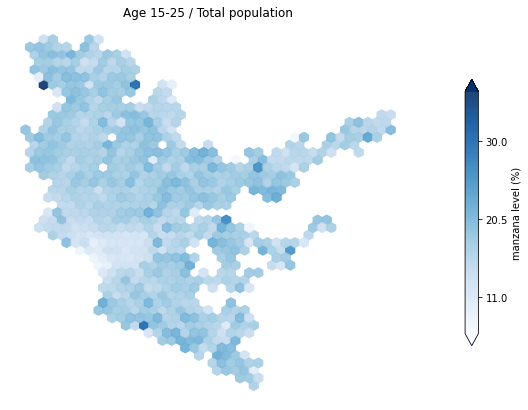

In [217]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var1 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5), label='manzana level (%)',ticks=np.linspace(MAP["var1"].quantile(0.1),
                                                                                          MAP["var1"].quantile(0.98),3), extend = "both")

ax.set_title('Age 15-25 / Total population', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map12.png', dpi=800)


# MAP 2: age 15-25 / PET

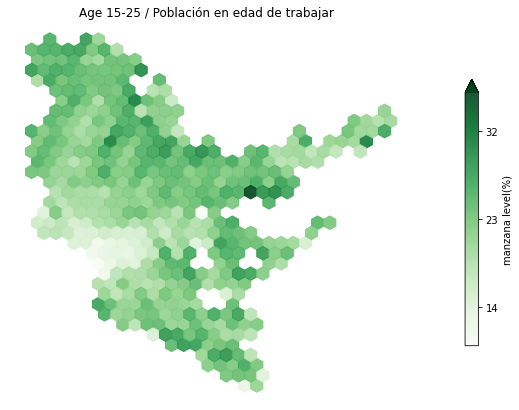

In [218]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var2 ,alpha=0.9, cmap='Greens')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)',ticks=np.linspace(MAP["var2"].quantile(0.1),
                                                                                          MAP["var2"].quantile(0.9),3), extend = "max")

ax.set_title('Age 15-25 / Población en edad de trabajar ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map21.png', dpi=800)

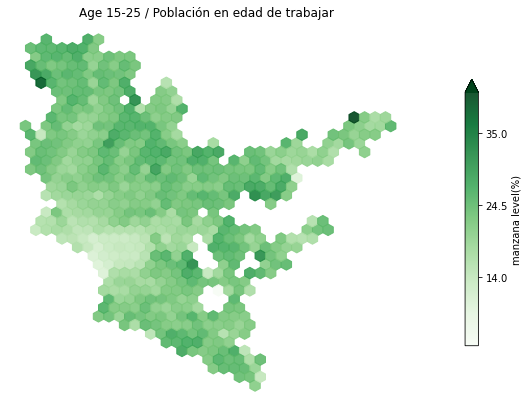

In [219]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=35, C= MAP.var2 ,alpha=0.9, cmap='Greens')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var2"].quantile(0.1),
                                                                                          MAP["var2"].quantile(0.95),3), extend = "max")

ax.set_title('Age 15-25 / Población en edad de trabajar ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map22.png', dpi=800)

# MAP 3: Age 15-29 / Total population

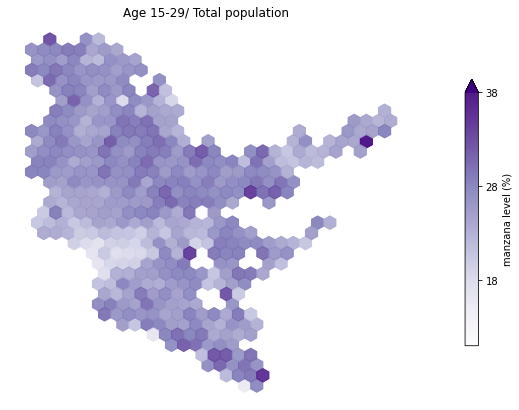

In [220]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var3 ,alpha=0.9, cmap='Purples')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)',ticks=np.linspace(MAP["var3"].quantile(0.1),
                                                                                          MAP["var3"].quantile(0.95),3), extend = "max")

ax.set_title('Age 15-29/ Total population ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map31.png', dpi=800)

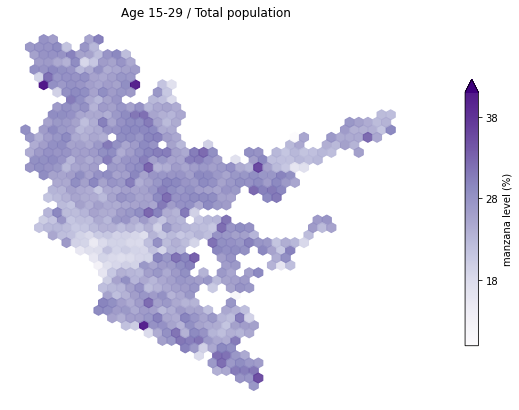

In [221]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var3 ,alpha=0.9, cmap='Purples')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)',ticks=np.linspace(MAP["var3"].quantile(0.1),
                                                                                          MAP["var3"].quantile(0.95),3), extend = "max")

ax.set_title('Age 15-29 / Total population ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map32.png', dpi=800)

# MAP 4 : PEAO / PET 



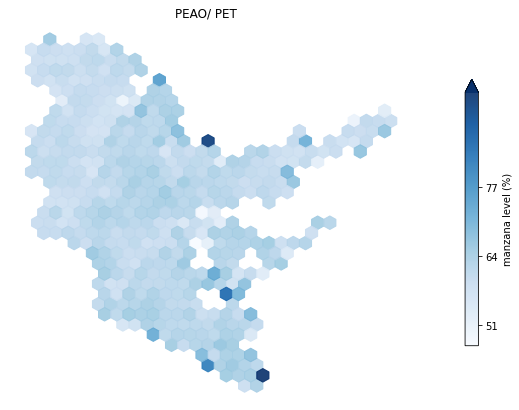

In [222]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var5 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)',ticks=np.linspace(MAP["var5"].quantile(0.1),
                                                                                          MAP["var5"].quantile(0.98),3), extend = "max")

ax.set_title('PEAO/ PET ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map41.png', dpi=800)

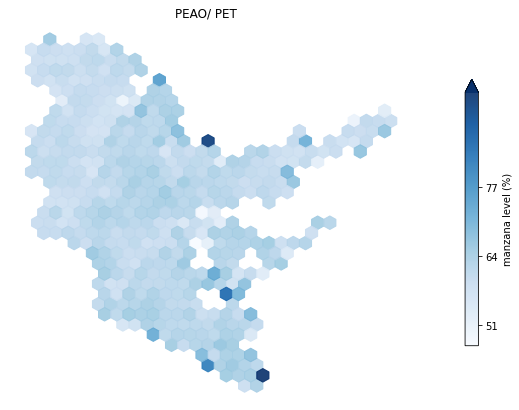

In [223]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var5 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)',ticks=np.linspace(MAP["var5"].quantile(0.1),
                                                                                          MAP["var5"].quantile(0.98),3), extend = "max")

ax.set_title('PEAO/ PET ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map42.png', dpi=800)

# MAP 5 : (PEA - PEAO) / PEA (unemployment)

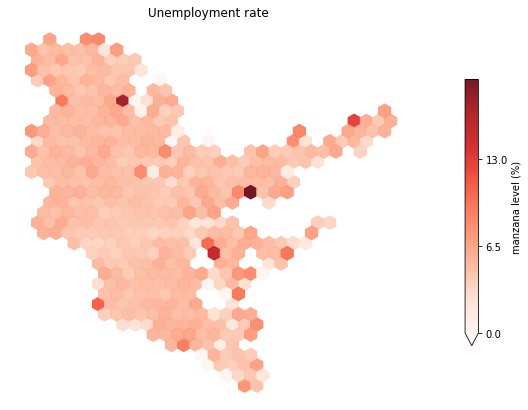

In [224]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var6 ,alpha=0.9, cmap='Reds')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)', ticks=np.linspace(MAP["var6"].quantile(0.1),
                                                                                          MAP["var6"].quantile(0.95),3), extend = "min")

ax.set_title('Unemployment rate', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map51.png', dpi=800)

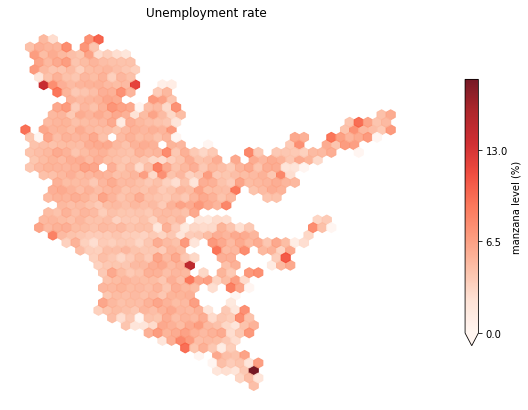

In [225]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var6 ,alpha=0.9, cmap='Reds')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)', ticks=np.linspace(MAP["var6"].quantile(0.1),
                                                                                          MAP["var6"].quantile(0.95),3), extend = "min")

ax.set_title('Unemployment rate ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map52.png', dpi=800)

# MAP 6: PEAO/PEA

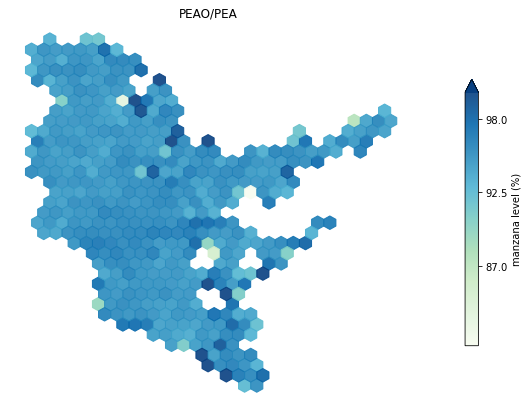

In [226]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var7 ,alpha=0.9, cmap='GnBu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level (%)', ticks=np.linspace(MAP["var7"].quantile(0.05),
                                                                                          MAP["var7"].quantile(0.75),3), extend = "max")

ax.set_title('PEAO/PEA', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map61.png', dpi=800)

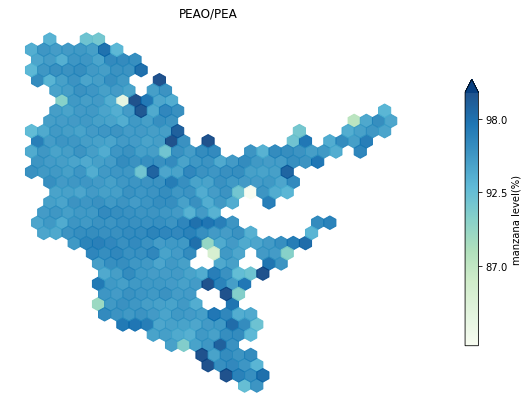

In [227]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var7 ,alpha=0.9, cmap='GnBu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var7"].quantile(0.05),
                                                                                          MAP["var7"].quantile(0.75),3), extend = "max")

ax.set_title('PEAO/PEA', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

In [228]:
# var 1: age 15-25 / total population per each manzana
# var 2: age 15-25 / PET
# var 3: age 15-29 / total population per each manzana
# var 4: age 15-29 / PET
# var 5: PEA / PET
# var 6 : (PEA - PEAO) / PEA
# var 7: PEAO/PEA
# var 8: SIS/POB_TOTAL
# var 9: ESSALUD/POB_TOTAL
# var 10: Seguro privado /POB_TOTAL
# var11: n° educación primaria/ POB_TOTAL
# var12: n° educación secundaria/ POB_TOTAL
# var13: n° educación superior universitaria incompleta / POB_TOTAL
# var14: n° educación superior universitaria incompleta / PET
# var15: n° educación superior universitaria completa / POB_TOTAL
# var16: n° educación superior universitaria completa / PET
# var17: n° educación superior universitaria incompleta + completa /POB_TOTAL
# var18: n° educación superior universitaria incompleta + completa / PET

# MAP 7: SIS /POB_TOTAL

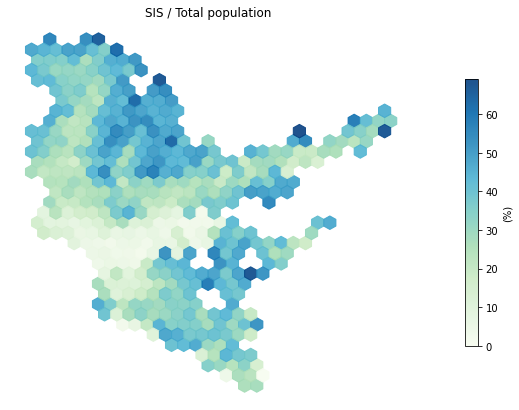

In [229]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var8 ,alpha=0.9, cmap='GnBu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='(%)')

ax.set_title('SIS / Total population', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map71.png', dpi=800)

# MAP 8: EsSalud /POB_TOTAL

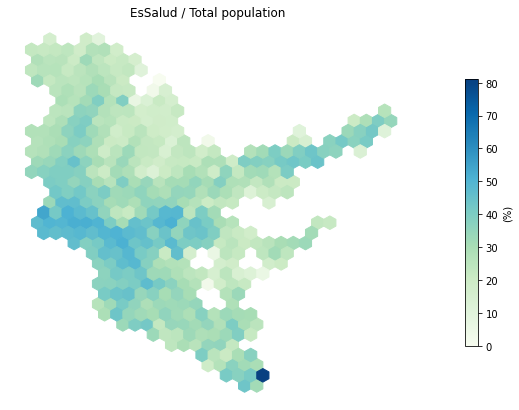

In [230]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var9 ,alpha=1, cmap='GnBu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='(%)')

ax.set_title('EsSalud / Total population', fontsize=12)

# drop axes b
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map81.png', dpi=800)

# Map 9: Private insurance / Total population

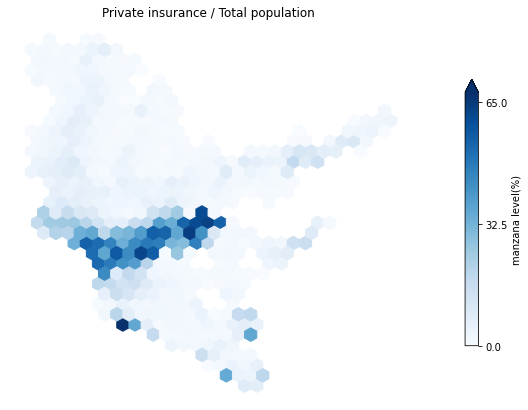

In [231]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var10 ,alpha=1, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var10"].quantile(0.25),
                                                                                          MAP["var10"].quantile(0.99),3), extend = "max")

ax.set_title('Private insurance / Total population', fontsize=12)

# drop axes b
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map91.png', dpi=800)

# MAP 10: n° Educación primaria / Población total

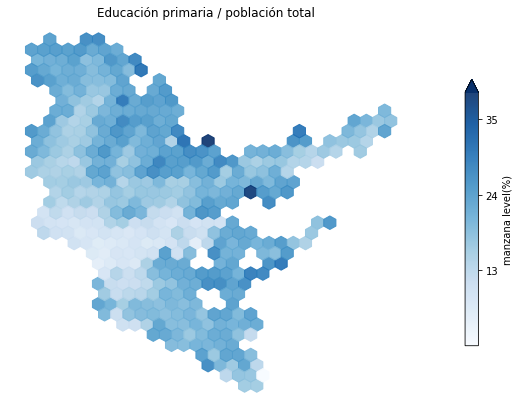

In [232]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var11 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var11"].quantile(0.25),
                                                                                          MAP["var11"].quantile(0.98),3), extend = "max")
ax.set_title('Educación primaria / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map10.png', dpi=800)

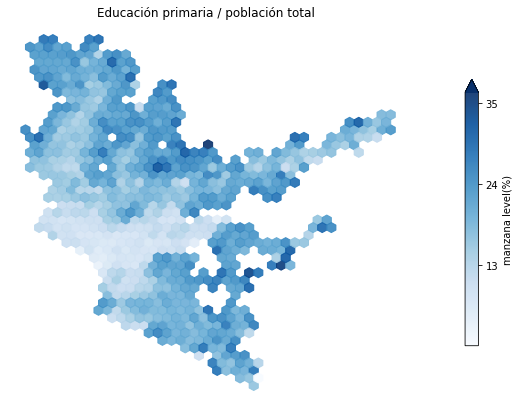

In [233]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var11 ,alpha=0.9, cmap='Blues')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var11"].quantile(0.25),
                                                                                          MAP["var11"].quantile(0.98),3), extend = "max")
ax.set_title('Educación primaria / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

# MAP 11: n° educación secundaria / Población total

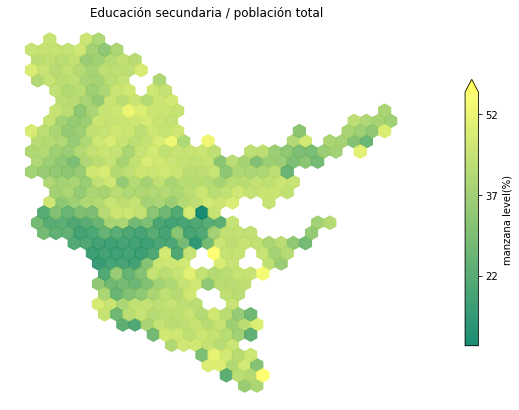

In [234]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var12 ,alpha=0.9, cmap='summer')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var12"].quantile(0.1),
                                                                                          MAP["var12"].quantile(0.90),3), extend = "max")

ax.set_title('Educación secundaria / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map11.png', dpi=800)

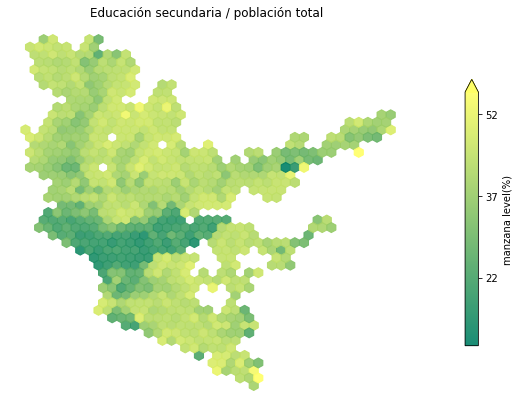

In [235]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var12 ,alpha=0.9, cmap='summer')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var12"].quantile(0.1),
                                                                                          MAP["var12"].quantile(0.90),3), extend = "max")

ax.set_title('Educación secundaria / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

# MAP 12: n° educación superior universitaria incompleta / POB_TOTAL

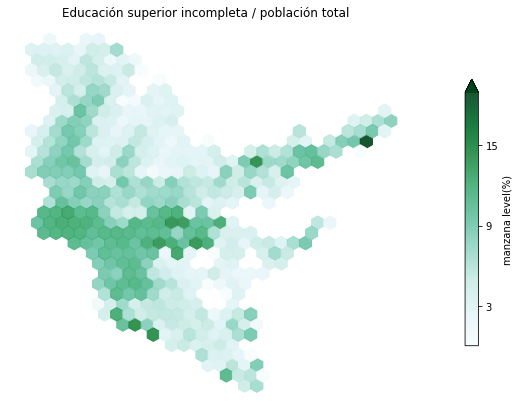

In [236]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var13 ,alpha=0.9, cmap='BuGn')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var13"].quantile(0.25),
                                                                                          MAP["var13"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior incompleta / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map12.png', dpi=800)

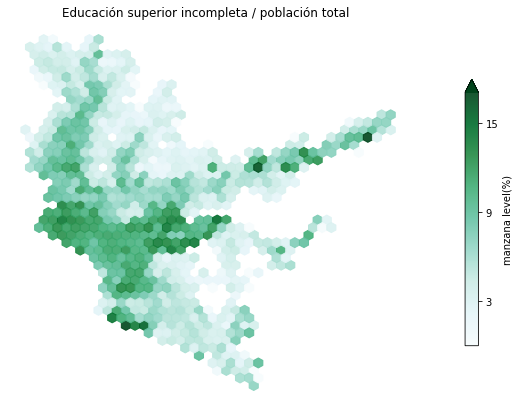

In [237]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var13 ,alpha=0.9, cmap='BuGn')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var13"].quantile(0.25),
                                                                                          MAP["var13"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior incompleta / población total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map12_2.png', dpi=800)

# MAP13 : n° educación superior universitaria incompleta / PET

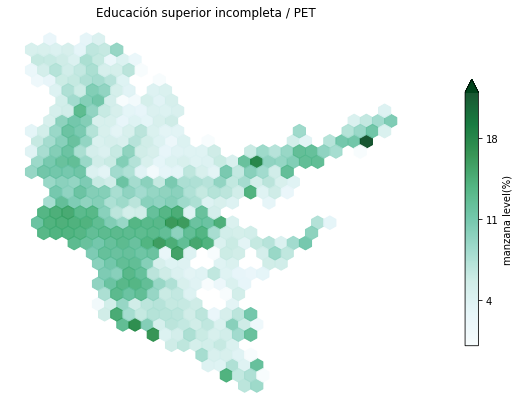

In [238]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var14 ,alpha=0.9, cmap='BuGn')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var14"].quantile(0.25),
                                                                                          MAP["var14"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior incompleta / PET ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map91.png', dpi=800)

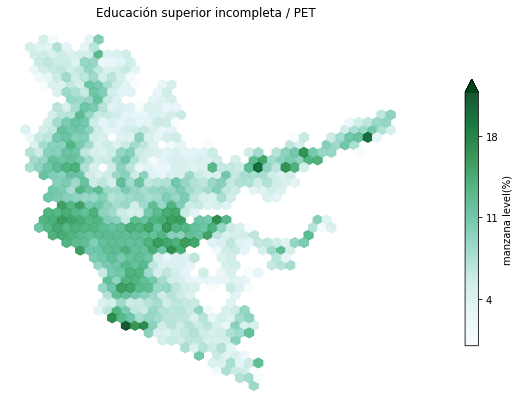

In [239]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var14 ,alpha=0.9, cmap='BuGn')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var14"].quantile(0.25),
                                                                                          MAP["var14"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior incompleta / PET ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map91.png', dpi=800)

# MAP 14: n° educación superior universitaria completa / POB_TOTAL

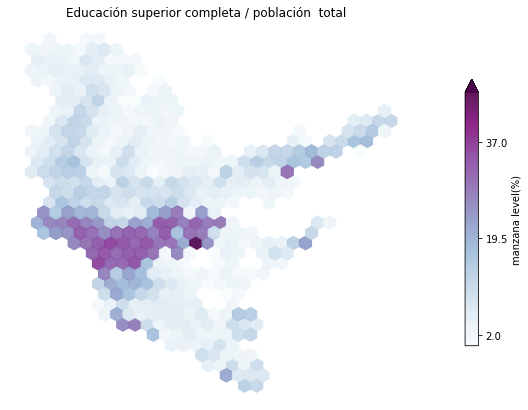

In [240]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var15 ,alpha=0.90, cmap='BuPu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var15"].quantile(0.2),
                                                                                          MAP["var15"].quantile(0.98),3), extend = "max")

ax.set_title('Educación superior completa / población  total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map14.png', dpi=800)

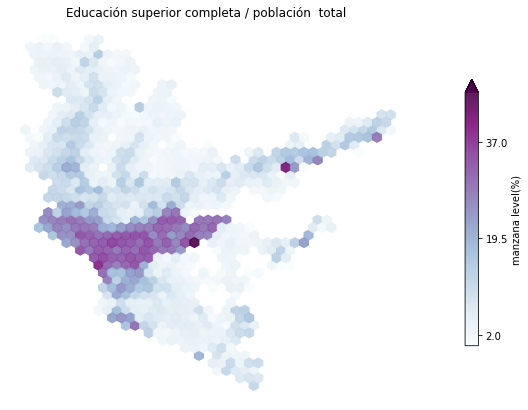

In [241]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var15 ,alpha=0.90, cmap='BuPu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var15"].quantile(0.2),
                                                                                          MAP["var15"].quantile(0.98),3), extend = "max")

ax.set_title('Educación superior completa / población  total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map41_2.png', dpi=800)

# MAP 14: n° educación superior universitaria completa / PET

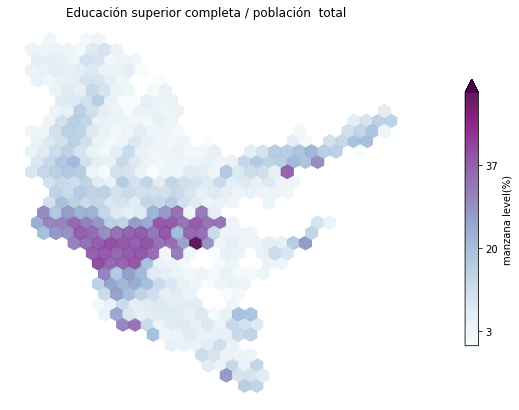

In [242]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var16 ,alpha=0.90, cmap='BuPu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var16"].quantile(0.25),
                                                                                          MAP["var16"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior completa / población  total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

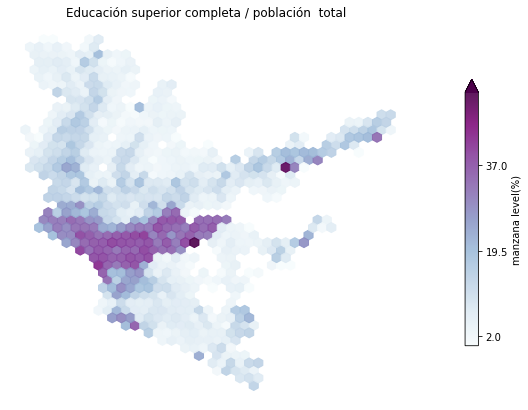

In [243]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var16 ,alpha=0.90, cmap='BuPu')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var16"].quantile(0.2),
                                                                                          MAP["var16"].quantile(0.95),3), extend = "max")

ax.set_title('Educación superior completa / población  total ', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

# MAP 15: n° educación superior universitaria completa + completa / PET

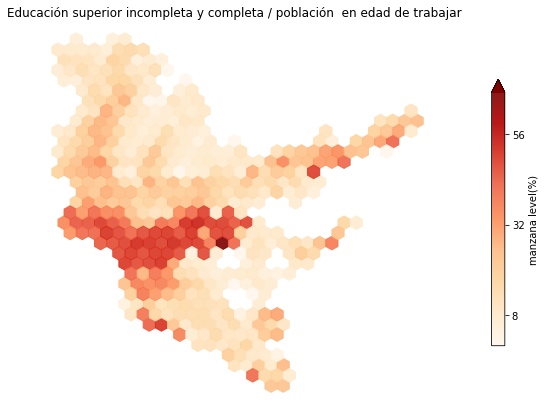

In [244]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=30, C= MAP.var18 ,alpha=0.9, cmap='OrRd')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var18"].quantile(0.25),
                                                                                          MAP["var18"].quantile(0.98),3), extend = "max")

ax.set_title('Educación superior incompleta y completa / población  en edad de trabajar', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)

figure.savefig(r'../outcome/mapa_manzana/Map15.png', dpi=800)

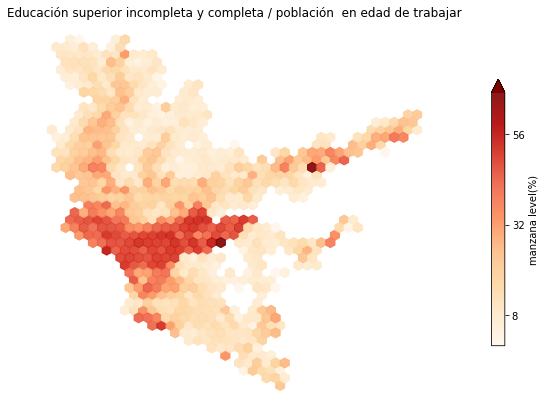

In [245]:
figure , ax = plt.subplots(1, figsize=(9, 7))

hb = ax.hexbin(MAP.lat, MAP.long, gridsize=40, C= MAP.var18 ,alpha=0.9, cmap='OrRd')
# Add a colorbar (optional)
plt.colorbar(hb, shrink=0.7,anchor=(0.5, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var18"].quantile(0.25),
                                                                                          MAP["var18"].quantile(0.98),3), extend = "max")

ax.set_title('Educación superior incompleta y completa / población  en edad de trabajar', fontsize=12)

# drop axes 
plt.xticks([])
plt.yticks([])

plt.box(False)